# Logistic Regression

Now that we have good grasp on logistic regression, let us work with this kaggle dataset.

1. Graduate admission
Link - https://www.kaggle.com/mohansacharya/graduate-admissions



Graduate Admission - Build a Logistic Regression model to determine whether student get admission based on selected features.

In [2]:
dataset = pd.read_csv("sample/Graduate_admission.csv")


In [3]:
dataset.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
dataset.head(20)

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
dataset.drop('Serial No.', axis = 1, inplace = True)

In [7]:
dataset.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


<AxesSubplot:>

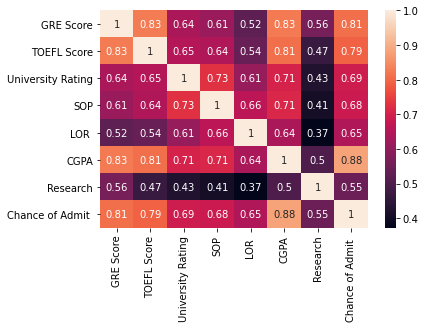

In [8]:
#EDA

dataset.corr()

sns.heatmap(dataset.corr(), annot = True)

In [9]:
# Finding the best features based on correlation

x = dataset.iloc[:, 1: -1]
y = dataset.iloc[:, -1]

In [10]:
x

,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,118,4,4.5,4.5,9.65,1
1,107,4,4.0,4.5,8.87,1
2,104,3,3.0,3.5,8.00,1
3,110,3,3.5,2.5,8.67,1
4,103,2,2.0,3.0,8.21,0
5,115,5,4.5,3.0,9.34,1
6,109,3,3.0,4.0,8.20,1
7,101,2,3.0,4.0,7.90,0
8,102,1,2.0,1.5,8.00,0
9,108,3,3.5,3.0,8.60,0


In [11]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
5      0.90
6      0.75
7      0.68
8      0.50
9      0.45
10     0.52
11     0.84
12     0.78
13     0.62
14     0.61
15     0.54
16     0.66
17     0.65
18     0.63
19     0.62
20     0.64
21     0.70
22     0.94
23     0.95
24     0.97
25     0.94
26     0.76
27     0.44
28     0.46
29     0.54
30     0.65
31     0.74
32     0.91
33     0.90
34     0.94
35     0.88
36     0.64
37     0.58
38     0.52
39     0.48
40     0.46
41     0.49
42     0.53
43     0.87
44     0.91
45     0.88
46     0.86
47     0.89
48     0.82
49     0.78
50     0.76
51     0.56
52     0.78
53     0.72
54     0.70
55     0.64
56     0.64
57     0.46
58     0.36
59     0.42
60     0.48
61     0.47
62     0.54
63     0.56
64     0.52
65     0.55
66     0.61
67     0.57
68     0.68
69     0.78
70     0.94
71     0.96
72     0.93
73     0.84
74     0.74
75     0.72
76     0.74
77     0.64
78     0.44
79     0.46
80     0.50
81     0.96
82     0.92
83  

In [12]:
from sklearn.model_selection import train_test_split as ttst

xtrain, xtest, ytrain, ytest = ttst(x, y, random_state = 0, test_size = 0.25)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

In [13]:
xtrain

array([[-1.17111757, -1.88482457, -1.93767618, -1.65378367, -1.17809274,
        -1.18484014],
       [-0.52858782, -1.00789006, -1.4382751 , -1.65378367, -0.50111652,
        -1.18484014],
       [-0.68922025,  0.74597895, -0.43947295, -1.11167801, -0.96344174,
         0.84399572],
       ...,
       [-0.52858782,  0.74597895, -1.4382751 , -1.11167801, -1.8880922 ,
        -1.18484014],
       [ 1.88089878,  1.62291346,  1.05873029,  0.51463898,  1.81050963,
        -1.18484014],
       [ 0.43520682,  0.74597895,  0.55932921,  1.5988503 ,  0.86934755,
         0.84399572]])

In [14]:
xtest

array([[-0.16021168, -0.88273916,  0.88801353,  0.69565217, -0.9708672 ,
         1.02429504],
       [ 1.27024979,  0.86872743,  0.88801353,  1.7826087 ,  1.05430426,
        -0.97628121],
       [ 0.73382673, -0.00700587, -0.72851595, -0.39130435,  0.68302283,
         1.02429504],
       [ 1.62786515,  1.74446073,  1.42685669,  1.7826087 ,  0.98679855,
         1.02429504],
       [-0.87544242, -0.00700587, -0.72851595, -1.47826087, -0.61646219,
         1.02429504],
       [-0.33901937, -0.00700587,  0.34917037, -0.93478261, -0.3295629 ,
        -0.97628121],
       [-1.0542501 , -0.88273916, -1.80620228, -1.47826087, -1.07212577,
        -0.97628121],
       [ 0.55501905, -0.00700587,  0.88801353,  1.23913043,  0.00796567,
        -0.97628121],
       [-1.23305779, -1.75847246, -1.80620228, -1.47826087, -1.00462005,
        -0.97628121],
       [-0.33901937, -0.00700587, -0.18967279,  0.69565217,  0.42987639,
        -0.97628121],
       [-0.69663474, -0.88273916, -0.72851595, -1.

In [15]:
#We will be using binary classification

dataset['Chance of Admit '].describe()

# We see that the mean is 0.72 and the median is 0.72 which tells us that this is an perfect guassian curve

count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64

In [16]:
ytrain_binary = (ytrain > 0.70).astype(int) # In YTrain subset, all values above 0.70 is 1 and else are 0
ytest_binary = (ytest > 0.70).astype(int) # In YTest subset, all values above 0.70 is 1 and else are 0

In [17]:
ytrain_binary = ytrain_binary.values.ravel()
ytrain_binary

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,

In [18]:
ytest_binary = ytest_binary.values.ravel()
ytest_binary

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [19]:
from sklearn.linear_model import LogisticRegression

classifier_log = LogisticRegression()

In [20]:
classifier_log.fit(xtrain, ytrain_binary)

LogisticRegression()

In [21]:
ypredict_log = classifier_log.predict(xtest)
ypredict_log

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0])

In [22]:
modelaccuracy_actuallog = (classifier_log.score(xtest, ytest_binary)) * 100 
modelaccuracy_actuallog

87.2

In [23]:
modelaccuracy_predictedlog = (classifier_log.score(xtest, ypredict_log)) * 100 
modelaccuracy_predictedlog

100.0

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(ytest_binary, ypredict_log))

[[50  8]
 [ 8 59]]


Confusion Matrix has four categories, True Positve, True Negative, False Negative, True Negative it is represented as follow


    True Positive (TP)  |  False Positive (FP)
    ____________________|______________________
                        |
    True Negative (TN)  |  False Negative (FN)
    
    
* true positives (TP): These are cases in which we predicted yes (they have the disease), and they do have the disease.
* true negatives (TN): We predicted no, and they don't have the disease.
* false positives (FP): We predicted yes, but they don't actually have the disease. (Also known as a "Type I error.")
* false negatives (FN): We predicted no, but they actually do have the disease. (Also known as a "Type II error.")

In [25]:
print(classification_report(ypredict_log, ytest_binary))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        58
           1       0.88      0.88      0.88        67

    accuracy                           0.87       125
   macro avg       0.87      0.87      0.87       125
weighted avg       0.87      0.87      0.87       125



#### Accuracy

Accuracy = (TP+TN)/(TP+FP+TN+FN)=  (50+8)/(50+8+8+59) = 46.40% Accuracy alone doesn't tell the full story when we are working with a class-imbalanced data set, like this one, where there is a significant disparity between the number of positive and negative labels.

#### Precision
Precision = TP/(TP+FP) = (50)/(58) = 86.20 Our model has a precision of —in other words, when it predicts a admission possibilty is Yes, it is correct 86% of the time.

#### Recall
Recall = TP/(TP+FN) =  50 / 109 = 45.87 % Our model has a recall of —in other words, it correctly predicts 54.13 of all admission possibility.

F score
Compute the F1 score, also known as balanced F-score or F-measure

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is: F1 = 2 (precision recall) / (precision + recall)=

Now that we have done using selected and trimmed features and measure the performance

In [26]:
# Let's start with EDA, SO far importing library and importing dataset are same.

data = dataset.copy()

#plot some graph and before this, let' see all the availabe columns

data.columns # we have 7 independent variable and 1 dependent variable chance of admit

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

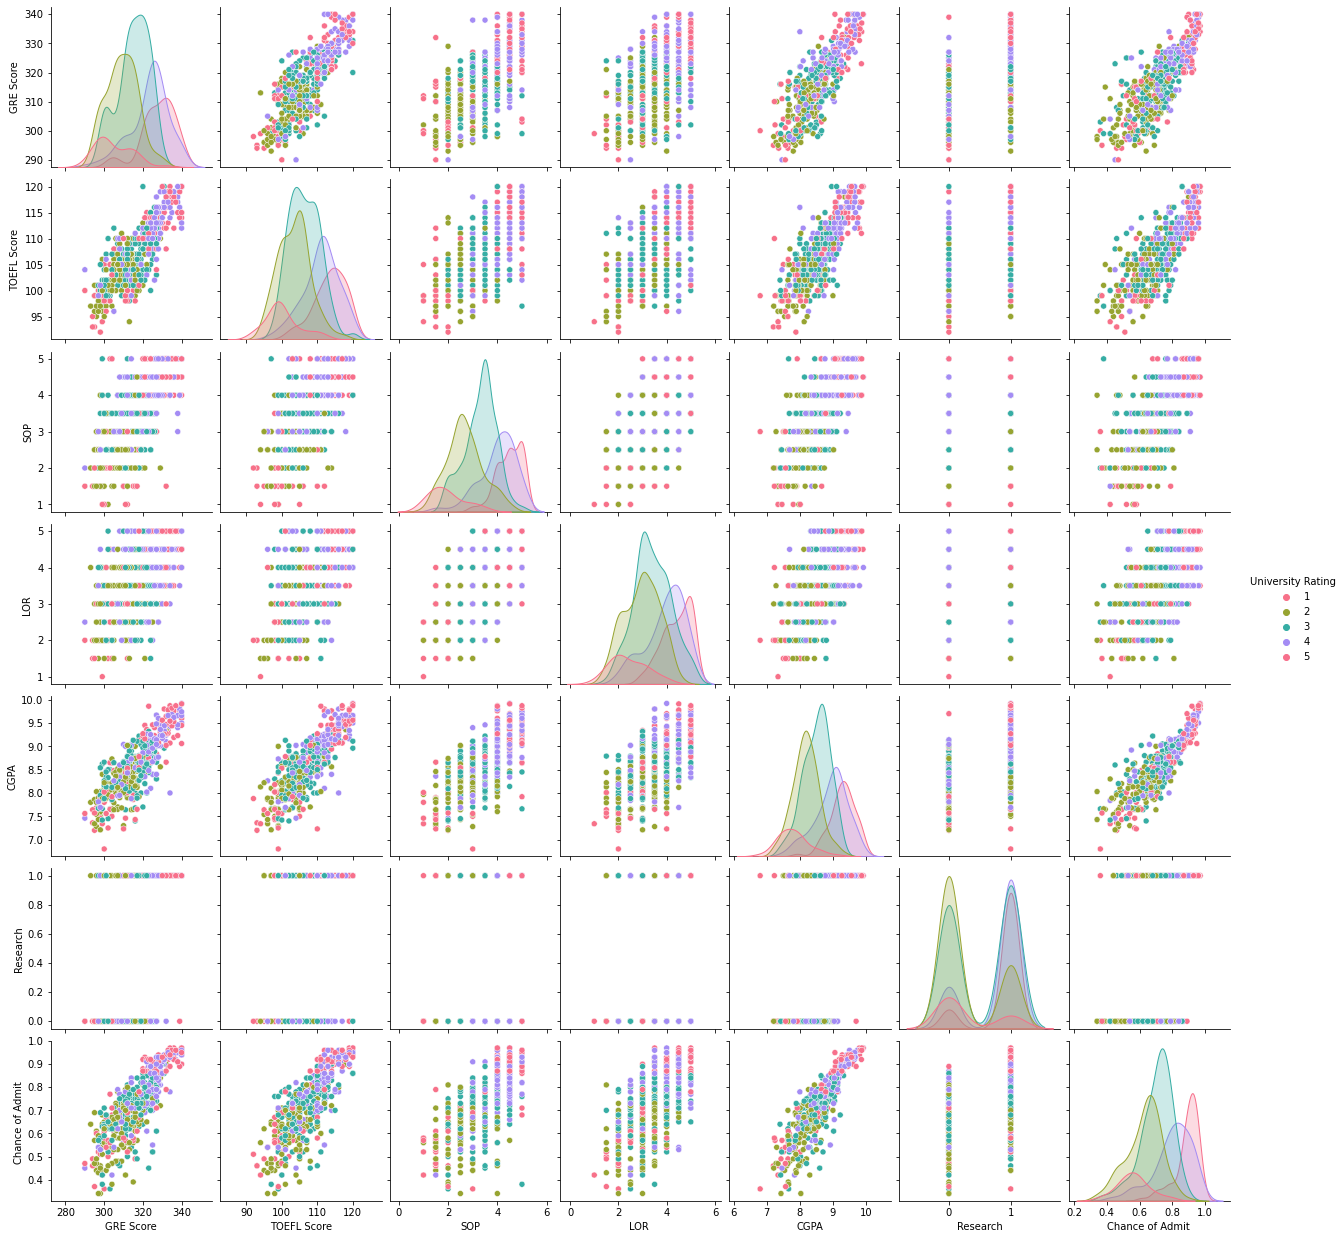

In [27]:
#Using seaborn's pairplot, let us see the correlation between all columns

# In seaborn, the hue parameter determines which column in the data frame should be used for colour encoding. 

sns.pairplot(data, kind = 'scatter', hue = 'University Rating', palette = 'husl')

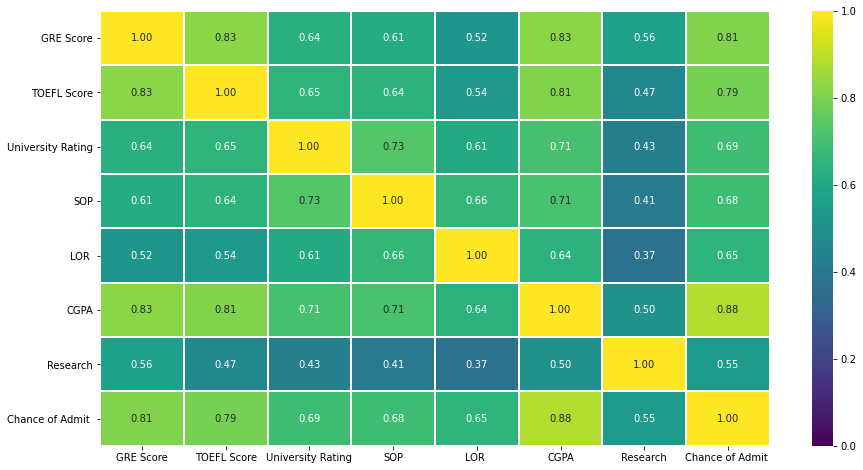

In [28]:
# Eyeball correlation between all columns using heatmap. The best one in arsenal of weapons. 

fig, ax = plt.subplots(figsize = (15,8))
sns.heatmap(data.corr(), ax = ax, annot = True, linewidth = 1, fmt = '.2f', cmap = 'viridis', vmin = 0, vmax = 1)
plt.show()

The columns with hgher correlation with Chance of Admit are, CGPA, GRE Score,TOEFL Score, University Rating, SOP, LOR, Research.

We will choose between 4 features with highest feature above 0.70, ie CGPA, GRE Score, TOEFL Score, 

In [29]:
# nstead you can summarise the same as well in a code

data.corr()['Chance of Admit '].round(3)

GRE Score            0.810
TOEFL Score          0.792
University Rating    0.690
SOP                  0.684
LOR                  0.645
CGPA                 0.882
Research             0.546
Chance of Admit      1.000
Name: Chance of Admit , dtype: float64

In [30]:
data.drop(columns = {'LOR ', 'Research'}, inplace = True)

In [33]:
data.describe()

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,8.576440,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.604813,0.14114
min,290.000000,92.000000,1.000000,1.000000,6.800000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,8.127500,0.63000
50%,317.000000,107.000000,3.000000,3.500000,8.560000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,9.040000,0.82000
max,340.000000,120.000000,5.000000,5.000000,9.920000,0.97000


In [37]:
# We have found that the median value of the Chance of Admit is 0.72

targets = np.where(data['Chance of Admit '] >= data['Chance of Admit '].median(), 1, 0)

data['Probability of Acceptance'] = targets

In [43]:
data.drop(columns = {'Chance of Admit '}, inplace = True)

In [45]:
data.head(20)

,GRE Score,TOEFL Score,University Rating,SOP,CGPA,Probability of Acceptance
0,337,118,4,4.5,9.65,1
1,324,107,4,4.0,8.87,1
2,316,104,3,3.0,8.00,1
3,322,110,3,3.5,8.67,1
4,314,103,2,2.0,8.21,0
5,330,115,5,4.5,9.34,1
6,321,109,3,3.0,8.20,1
7,308,101,2,3.0,7.90,0
8,302,102,1,2.0,8.00,0
9,323,108,3,3.5,8.60,0


In [46]:
x1 = data.iloc[:, :-1]
x1

,GRE Score,TOEFL Score,University Rating,SOP,CGPA
0,337,118,4,4.5,9.65
1,324,107,4,4.0,8.87
2,316,104,3,3.0,8.00
3,322,110,3,3.5,8.67
4,314,103,2,2.0,8.21
5,330,115,5,4.5,9.34
6,321,109,3,3.0,8.20
7,308,101,2,3.0,7.90
8,302,102,1,2.0,8.00
9,323,108,3,3.5,8.60


In [47]:
y1 = data.iloc[:, -1]
y1

0      1
1      1
2      1
3      1
4      0
5      1
6      1
7      0
8      0
9      0
10     0
11     1
12     1
13     0
14     0
15     0
16     0
17     0
18     0
19     0
20     0
21     0
22     1
23     1
24     1
25     1
26     1
27     0
28     0
29     0
30     0
31     1
32     1
33     1
34     1
35     1
36     0
37     0
38     0
39     0
40     0
41     0
42     0
43     1
44     1
45     1
46     1
47     1
48     1
49     1
50     1
51     0
52     1
53     1
54     0
55     0
56     0
57     0
58     0
59     0
60     0
61     0
62     0
63     0
64     0
65     0
66     0
67     0
68     0
69     1
70     1
71     1
72     1
73     1
74     1
75     1
76     1
77     0
78     0
79     0
80     0
81     1
82     1
83     1
84     1
85     1
86     1
87     0
88     0
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     1
98     1
99     1
100    0
101    0
102    0
103    0
104    1
105    0
106    1
107    1
108    1
109    0
110    0
1

In [58]:
x1train, x1test, y1train, y1test = ttst(x1, y1, random_state = 0, test_size = 0.25)

In [59]:
classifier_logreg = LogisticRegression()


In [60]:
classifier_logreg.fit(x1train, y1train)

C:\Anaconda_Navigator\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [61]:
ypredict_logreg = classifier_logreg.predict(x1test)
ypredict_logreg

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0])

In [62]:
classifier_logreg.score(x1train, y1train)

0.8693333333333333

In [66]:
classifier_logreg.score(x1test, y1test)

0.872

In [63]:
modelaccuracy_actuallogreg = (classifier_logreg.score(x1train, y1train)) * 100 
modelaccuracy_actuallog

87.2

In [64]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y1test, ypredict_logreg))

[[57  6]
 [10 52]]


In [65]:
print(classification_report(y1test, ypredict_logreg))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88        63
           1       0.90      0.84      0.87        62

    accuracy                           0.87       125
   macro avg       0.87      0.87      0.87       125
weighted avg       0.87      0.87      0.87       125

